In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import os
import time
%matplotlib inline

### Data ETL and Data Exploration

In [2]:
import os
# os.listdir('../../dbfs/FileStore')

movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [191]:
ratings.userId.value_counts()

414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
249    1046
387    1027
182     977
307     975
603     943
298     939
177     904
318     879
232     862
480     836
608     831
600     763
590     728
483     728
105     722
19      703
305     677
489     648
111     646
438     635
       ... 
467      22
245      21
293      21
37       21
439      21
324      21
507      21
364      21
598      21
49       21
157      21
547      21
87       21
549      21
26       21
281      21
320      20
207      20
576      20
194      20
189      20
257      20
147      20
53       20
278      20
406      20
595      20
569      20
431      20
442      20
Name: userId, Length: 610, dtype: int64

In [144]:
ratings.head()
avg_rating = ratings['rating'].sum()/ratings['rating'].size
avg_rating

3.501556983616962

In [145]:
new_ratings = pd.read_csv('ratings.csv')
new_ratings['mean_rating_user'] = new_ratings['rating'].groupby(new_ratings['userId']).transform('mean')
new_ratings['mean_rating_movie'] = new_ratings['rating'].groupby(new_ratings['movieId']).transform('mean')

# new_ratings['rating'] = new_ratings['rating'] - avg_rating
new_ratings.head()

,userId,movieId,rating,timestamp,mean_rating_user,mean_rating_movie
0,1,1,4.0,964982703,4.366379,3.920930
1,1,3,4.0,964981247,4.366379,3.259615
2,1,6,4.0,964982224,4.366379,3.946078
3,1,47,5.0,964983815,4.366379,3.975369
4,1,50,5.0,964982931,4.366379,4.237745


In [146]:
# ratings.groupby(['userId'])['rating'].mean()

In [147]:
user_mean = ratings.groupby(['userId'])['rating'].mean().sum()/610
user_mean

3.6572223377474

In [148]:
movie_mean = ratings.groupby(['movieId'])['rating'].mean().sum()/9724
movie_mean

3.262448274810963

In [149]:
new_ratings['overall_mean_user'] = user_mean
new_ratings['overall_mean_movie'] = movie_mean
new_ratings.head()

,userId,movieId,rating,timestamp,mean_rating_user,mean_rating_movie,overall_mean_user,overall_mean_movie
0,1,1,4.0,964982703,4.366379,3.920930,3.657222,3.262448
1,1,3,4.0,964981247,4.366379,3.259615,3.657222,3.262448
2,1,6,4.0,964982224,4.366379,3.946078,3.657222,3.262448
3,1,47,5.0,964983815,4.366379,3.975369,3.657222,3.262448
4,1,50,5.0,964982931,4.366379,4.237745,3.657222,3.262448


In [150]:
new_ratings['difference_user'] = new_ratings['mean_rating_user'] - new_ratings['overall_mean_user']
new_ratings['difference_movie'] = new_ratings['mean_rating_movie'] - new_ratings['overall_mean_movie']


In [151]:
new_ratings

,userId,movieId,rating,timestamp,mean_rating_user,mean_rating_movie,overall_mean_user,overall_mean_movie,difference_user,difference_movie
0,1,1,4.0,964982703,4.366379,3.920930,3.657222,3.262448,0.709157,0.658482
1,1,3,4.0,964981247,4.366379,3.259615,3.657222,3.262448,0.709157,-0.002833
2,1,6,4.0,964982224,4.366379,3.946078,3.657222,3.262448,0.709157,0.683630
3,1,47,5.0,964983815,4.366379,3.975369,3.657222,3.262448,0.709157,0.712921
4,1,50,5.0,964982931,4.366379,4.237745,3.657222,3.262448,0.709157,0.975297
5,1,70,3.0,964982400,4.366379,3.509091,3.657222,3.262448,0.709157,0.246643
6,1,101,5.0,964980868,4.366379,3.782609,3.657222,3.262448,0.709157,0.520160
7,1,110,4.0,964982176,4.366379,4.031646,3.657222,3.262448,0.709157,0.769197
8,1,151,5.0,964984041,4.366379,3.545455,3.657222,3.262448,0.709157,0.283006
9,1,157,5.0,964984100,4.366379,2.863636,3.657222,3.262448,0.709157,-0.398812


In [152]:
new_ratings['rating'] = new_ratings['rating'] - new_ratings['difference_user'] - new_ratings['difference_movie']-avg_rating

In [153]:
new_ratings

,userId,movieId,rating,timestamp,mean_rating_user,mean_rating_movie,overall_mean_user,overall_mean_movie,difference_user,difference_movie
0,1,1,-0.869196,964982703,4.366379,3.920930,3.657222,3.262448,0.709157,0.658482
1,1,3,-0.207881,964981247,4.366379,3.259615,3.657222,3.262448,0.709157,-0.002833
2,1,6,-0.894344,964982224,4.366379,3.946078,3.657222,3.262448,0.709157,0.683630
3,1,47,0.076365,964983815,4.366379,3.975369,3.657222,3.262448,0.709157,0.712921
4,1,50,-0.186011,964982931,4.366379,4.237745,3.657222,3.262448,0.709157,0.975297
5,1,70,-1.457357,964982400,4.366379,3.509091,3.657222,3.262448,0.709157,0.246643
6,1,101,0.269126,964980868,4.366379,3.782609,3.657222,3.262448,0.709157,0.520160
7,1,110,-0.979911,964982176,4.366379,4.031646,3.657222,3.262448,0.709157,0.769197
8,1,151,0.506280,964984041,4.366379,3.545455,3.657222,3.262448,0.709157,0.283006
9,1,157,1.188098,964984100,4.366379,2.863636,3.657222,3.262448,0.709157,-0.398812


In [154]:
print 'Distinct values of ratings:'
print sorted(ratings.rating.unique())

Distinct values of ratings:
[0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


In [6]:
print 'For the users that rated movies and the movies that were rated:'
print 'Minimum number of ratings per user is', ratings.userId.value_counts().min()
print 'Minimum number of ratings per movie is', ratings.movieId.value_counts().min()

For the users that rated movies and the movies that were rated:
Minimum number of ratings per user is 20
Minimum number of ratings per movie is 1


In [7]:
print '{} out of {} movies are rated by only one user'.format(sum(ratings.movieId.value_counts() == 1), \
                                                              len(ratings.movieId.unique()))

3446 out of 9724 movies are rated by only one user


In [8]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [9]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


### Q1: The number of Users

In [10]:
num_users = np.union1d(ratings['userId'], tags['userId']).shape[0]
num_users

610

### Q2: The number of Movies

In [11]:
np.union1d(ratings['movieId'], tags['movieId']).shape[0]

9742

### Q3: How many movies are rated by users? List movies not rated before

In [12]:
num_movies_rated = ratings['movieId'].unique().shape[0]
num_movies_rated

9724

In [13]:
all_movies = np.union1d(ratings['movieId'], tags['movieId'])
rated = ratings['movieId'].unique()
not_rated = [x for x in all_movies if x not in rated]

# showing 20 examples only
pd.DataFrame(not_rated, columns = ['movieId']).head(20)


,movieId
0,1076
1,2939
2,3338
3,3456
4,4194
5,5721
6,6668
7,6849
8,7020
9,7792


### Q4: List Movie Genres

In [14]:
# showing 20 examples only
pd.DataFrame(movies['genres'].unique(), columns = ['genres']).head(20)

,genres
0,Adventure|Animation|Children|Comedy|Fantasy
1,Adventure|Children|Fantasy
2,Comedy|Romance
3,Comedy|Drama|Romance
4,Comedy
5,Action|Crime|Thriller
6,Adventure|Children
7,Action
8,Action|Adventure|Thriller
9,Comedy|Horror


### Q5: Movie for Each Category

In [15]:
# showing top 20 only
movies["genres"].value_counts().head(20) 

Drama                      1053
Comedy                      946
Comedy|Drama                435
Comedy|Romance              363
Drama|Romance               349
Documentary                 339
Comedy|Drama|Romance        276
Drama|Thriller              168
Horror                      167
Horror|Thriller             135
Crime|Drama                 134
Crime|Drama|Thriller        125
Drama|War                   114
Comedy|Crime                101
Action|Comedy                92
Thriller                     84
Children|Comedy              74
Comedy|Horror                69
Action|Crime|Thriller        66
Action|Adventure|Sci-Fi      66
Name: genres, dtype: int64

### Prepare Data for Training

In [155]:
rating_data = new_ratings[['userId','movieId','rating']]
# rating_data = ratings[['userId','movieId','rating']]

In [133]:
rating_data.head()

,userId,movieId,rating
0,1,1,-5.079910
1,1,3,-4.418595
2,1,6,-5.105058
3,1,47,-4.134349
4,1,50,-4.396725


## We will use a num_users x num_movies_rated matrix to represent the ratings, in which zeros are the user-movie pairs without a rating.

In [156]:
ratings_matrix = np.zeros((num_users, num_movies_rated))

usersId = np.sort(ratings.userId.unique())
moviesId = np.sort(ratings.movieId.unique())

for i in range(len(rating_data)):
    user = rating_data.iloc[i, 0]
    movie = rating_data.iloc[i, 1]
    ratings_matrix[usersId == user, moviesId == movie] = rating_data.iloc[i, 2]
    
ratings_matrix

array([[-0.87,  0.  , -0.21, ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [-1.14, -1.15, -0.98, ...,  0.  ,  0.  ,  0.  ],
       [-0.77,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.81,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [ ]:
def convert_to_binary(org_matrix,prediction_matrix,thereshold):
    

In [157]:
ratings_matrix.shape

(610, 9724)

## Now we split the data into training/validation/testing sets using a 6/2/2 ratio. We use a for loop to split the existing ratings for each user. Because the minimum number of ratings per user is 20, each user will have at least 12, 4, and 4 ratings in the training, validation, and testing sets, respectively.

In [167]:
import random
random.seed(0)

def data_split(ratings, ratio):
    test = np.zeros(ratings.shape)
    train = ratings.copy()
    for user in xrange(ratings.shape[0]):
        index = ratings[user, :].nonzero()[0]
        k = int(round(len(index) * ratio))
        test_ratings = random.sample(index, k)
        train[user, test_ratings] = 0.
        test[user, test_ratings] = ratings[user, test_ratings]
        
    return train, test


In [168]:
train_matrix, tmp = data_split(ratings_matrix, 0.4)
validation_matrix, test_matrix = data_split(tmp, 0.5)

In [169]:
print 'Number of ratings in the training set:', (train_matrix > 0).sum()
print 'Number of ratings in the validation set:', (validation_matrix > 0).sum()
print 'Number of ratings in the testing set:', (test_matrix > 0).sum()


Number of ratings in the training set: 29083
Number of ratings in the validation set: 9733
Number of ratings in the testing set: 9706


In [170]:
train_matrix.shape
validation_matrix.shape
test_matrix.shape

(610, 9724)

### ALS Model
Now we’ll build a ALS model. The implementation below is borrowed and modified from here. One main modification is that we train the model with the mean subtracted ratings here. At the prediction step, the mean rating will be added back. This approach makes it easier for the model to converge.



In [171]:
from numpy.linalg import solve

class ALS(object):
    
    def __init__(self, ratings, n_factors=10, reg=0.0, verbose=False):
        """
        Train a matrix factorization model to predict empty 
        entries in a matrix. The terminology assumes a 
        ratings matrix which is ~ user x item
        
        Params
        ======
        ratings : (ndarray)
            User x Item matrix with corresponding ratings
        
        n_factors : (int)
            Number of latent factors to use in matrix 
            factorization model
        
        reg : (float)
            Regularization term for both user and item latent factors
        
        verbose : (bool)
            Whether or not to printout training progress
        """
        
        # we will train the model with the mean subtracted ratings, and 
        # at the prediction step, the mean will be added back. 
        self.raw_ratings = ratings
#         self.mean = ratings[ratings != 0].mean()
        self.ratings = ratings.copy() 
#         self.ratings[ratings > 0] = self.ratings[ratings > 0] - self.mean
        self.n_users, self.n_items = ratings.shape
        self.n_factors = n_factors
        self.reg = reg
        self._v = verbose

    def als_step(self, latent_vectors, fixed_vecs, ratings, _lambda, type='user'):
        """
        One of the two ALS steps. Solve for the latent vectors
        specified by type.
        """
        if type == 'user':
            # Precompute for the item latent vectors
            YTY = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(YTY.shape[0]) * _lambda

            for u in xrange(latent_vectors.shape[0]):
                #latent_vectors[u, :] = (solve((YTY + lambdaI).T, (ratings[u, :].dot(fixed_vecs)).T)).T
                latent_vectors[u, :] = solve((YTY + lambdaI), ratings[u, :].dot(fixed_vecs))
        elif type == 'item':
            # input your code here to get the Y matrix
            # think about the function 2 
            XTX = fixed_vecs.T.dot(fixed_vecs)
            lambdaI = np.eye(XTX.shape[0]) * _lambda
            
            for i in xrange(latent_vectors.shape[0]):
                latent_vectors[i, :] = solve((XTX + lambdaI), 
                                             ratings[:, i].T.dot(fixed_vecs))
            
    
        return latent_vectors

    def train(self, n_iter=10):
        """ Train model for n_iter iterations from scratch."""
        # initialize latent vectors using a normal distribution centered at 0
        self.user_vecs = np.random.normal(0,1,(self.n_users, self.n_factors)) 
        self.item_vecs = np.random.normal(0,1,(self.n_items, self.n_factors)) 
       
        self.partial_train(n_iter)
    
    def partial_train(self, n_iter):
        """ 
        Train model for n_iter iterations. Can be 
        called multiple times for further training.
        """
        count = 1
        while count <= n_iter:
            if count % 10 == 0 and self._v:
                print '\tcurrent iteration: {}'.format(count)
            self.user_vecs = self.als_step(self.user_vecs, 
                                           self.item_vecs, 
                                           self.ratings, 
                                           self.reg, 
                                           type='user')
            self.item_vecs = self.als_step(self.item_vecs, 
                                           self.user_vecs, 
                                           self.ratings, 
                                           self.reg, 
                                           type='item')
            count += 1
    
    def predict_all(self):
        """ Predict ratings for every user and item. """
        predictions = self.user_vecs.dot(self.item_vecs.T) #+ self.mean        
        return predictions
    
    def calculate_learning_curve(self, iter_array, valid):
        """
        Keep track of RMSE as a function of training iterations.
        
        Params
        ======
        iter_array : (list)
            List of numbers of iterations to train for each step of 
            the learning curve. e.g. [1, 5, 10, 20]
        valid : (2D ndarray)
            Validation dataset (assumed to be user x item).
        
        The function creates two new class attributes:
        
        train_rmse : (list)
            Training data RMSE values for each value of iter_array
        valid_rmse : (list)
            Validation data RMSE values for each value of iter_array
        """
        self.iter_array = iter_array
        self.iter_array.sort()
        self.train_rmse =[]
        self.valid_rmse = []
        iter_diff = 0
        for (i, n_iter) in enumerate(self.iter_array):
            if self._v:
                print 'Iteration: {}'.format(n_iter)
            if i == 0:
                self.train(n_iter - iter_diff)
            else:
                self.partial_train(n_iter - iter_diff)

            predictions = self.predict_all()

            self.train_rmse += [get_rmse(predictions, self.raw_ratings)]
            self.valid_rmse += [get_rmse(predictions, valid)]
            if self._v:
                print 'Train RMSE: ' + str(self.train_rmse[-1])
                print 'Validation RMSE: ' + str(self.valid_rmse[-1])
            iter_diff = n_iter

    def plot_learning_curve(self):
        """ Plot the learning curves """
        plt.plot(self.iter_array, self.train_rmse, label='Training', linewidth=5)
        plt.plot(self.iter_array, self.valid_rmse, label='Validation', linewidth=5)
        plt.xticks(range(0, max(self.iter_array) + 1, 2), fontsize=16)
        plt.yticks(fontsize=16)
        plt.xlabel('iterations', fontsize=30)
        plt.ylabel('RMSE', fontsize=30)
        plt.legend(loc='best', fontsize=20) 
        plt.show()

        
def get_rmse(predictions, ratings):
    """ Calculate RMSE for predicted ratings"""
    diff = (predictions - ratings)[ratings != 0]
    return np.sqrt((diff**2).mean())

### Model Selection and Evaluation
With the ALS model, we can use a grid search to find the optimal hyperparameters.

In [172]:
latent_factors = [6, 8, 10, 12, 14]
regularizations = [0.05, 0.1, 0.2, 0.4, 0.8]

# latent_factors = [18, 12, 14,16,20]
# regularizations = [0.05, 0.1, 0.2, 0.4, 0.8]

best_params = {}
best_params['n_factors'] = latent_factors[0]
best_params['reg'] = regularizations[0]
best_params['valid_rmse'] = np.inf
best_params['model'] = None

start_time = time.time()


for fact in latent_factors:
    for reg in regularizations:
       # put your code here to get the best model
        model =  ALS(ratings= train_matrix, n_factors=fact, reg=reg, verbose=True)
        model.train()
        predictions = model.predict_all()
        acc = get_rmse(predictions, validation_matrix)
        if acc < best_params['valid_rmse']:
            best_params['n_factors'] = fact
            best_params['reg'] = reg
            best_params['valid_rmse'] = acc
            best_params['model'] = ALS(ratings= train_matrix, n_factors=fact, reg=reg, verbose=True)
            
#             print("predictions:",predictions)
#             print("acc:",acc)
# ratings_matrix
#         train_matrix
#         validation_matrix
#         test_matrix


print '\nThe best model has {} latent factors and regularization = {}'.format(\
        best_params['n_factors'], best_params['reg'])        
print 'Total Runtime: {:.2f} seconds'.format(time.time() - start_time)

	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10
	current iteration: 10

The best model has 14 latent factors and regularization = 0.8
Total Runtime: 119.72 seconds


In [65]:
# ##### test 
# model =  ALS(ratings= ratings_matrix, n_factors= 8, reg=0.5, verbose=True)
# model.calculate_learning_curve( [1, 2, 5, 10], validation_matrix)

In [62]:
# ############# test
# acc = get_rmse(train_matrix, validation_matrix)
# acc

3.6492613611322944

The model with 10 latent factors and lambda = 0.4 yields the best result. Let's plot the learning curves for this model.

In [173]:
best_model = best_params['model']
iter_array = [1, 2, 5, 10]

In [180]:
best_model.predict_all().shape

(610, 9724)

In [174]:
best_model.calculate_learning_curve(iter_array, validation_matrix)

Iteration: 1
Train RMSE: 0.8278235278565723
Validation RMSE: 0.823012737822563
Iteration: 2
Train RMSE: 0.7324477904868231
Validation RMSE: 0.8208763230849087
Iteration: 5
Train RMSE: 0.7249109884041062
Validation RMSE: 0.816242061504454
Iteration: 10
Train RMSE: 0.7250583079352593
Validation RMSE: 0.8148921631141635


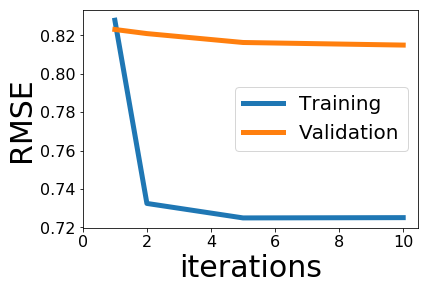

In [175]:
best_model.plot_learning_curve()

And finally, let's check the testing error.

In [78]:
print 'For testing data the RMSE is {}'.format(get_rmse(best_model.predict_all(), test_matrix))


For testing data the RMSE is 0.815939202943


This is consistent with our validation error.

Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.   1.  ]
 [0.33 0.   0.67]]


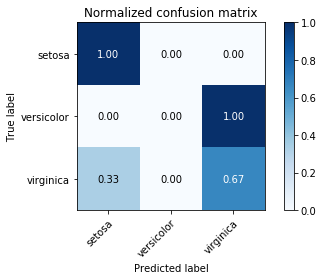

In [70]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels




# import some data to play with
iris = datasets.load_iris()
# X = iris.data
# y = iris.target
class_names = iris.target_names
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

# Plot normalized confusion matrix
plot_confusion_matrix(y_true, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [207]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='|S10')

In [196]:
#original=training matrix, mat1 = predicted, mat2 = groundtruth
def cmdata(original, mat1, mat2, n):
    rates = np.arange(n+1)*1.0 / n
    tpr = []
    fpr = []
#     print(rates)
    bi_predict, bi_test = [],[]
    for r in rates:
        threshold = []
        for i in range(original.shape[0]):
            min_temp = np.min(original[i][np.nonzero(original[i])])
            max_temp = np.max(original[i][np.nonzero(original[i])])
            threshold.append(min_temp + r * (max_temp - min_temp))
        #print(threshold)
        flat1 = []
        flat2 = []
        for i in range(mat2.shape[0]):
            for j in range(mat2.shape[1]):
                if mat2[i][j] != 0:
                    if mat1[i][j] >= threshold[i]:
                        flat1.append(1)
                    else:
                        flat1.append(0)
                    if mat2[i][j] >= threshold[i]:
                        flat2.append(1)
                    else:
                        flat2.append(0)
        #print(flat1, flat2)
        bi_predict.append(flat1)
        bi_test.append(flat2)
        TP = 0.0
        TN = 0.0
        FP = 0.0
        FN = 0.0
        for i in range(len(flat1)):
            if (flat1[i] == 1) and (flat2[i] == 1):
                TP += 1
            elif (flat1[i] == 1) and (flat2[i] == 0):
                FP += 1
            elif (flat1[i] == 0) and (flat2[i] == 1):
                FN += 1
            else:
                TN += 1
#         print(TP, TN, FP, FN)
        tpr.append(TP / (TP+FN))
        fpr.append(FP / (FP+TN))
    
    return bi_predict, bi_test,np.array(tpr), np.array(fpr)

In [177]:
train_val_matrix = train_matrix + validation_matrix
train_all_best_model = ALS(ratings = train_val_matrix, n_factors=fact, reg=reg, verbose=True)
train_all_best_model.train()

	current iteration: 10


In [210]:
bi_predict,bi_test = [],[]
bi_predict,bi_test, tpr, fpr = cmdata(train_val_matrix, train_all_best_model.predict_all(), test_matrix, n = 10)


Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


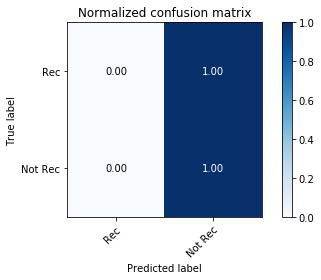

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


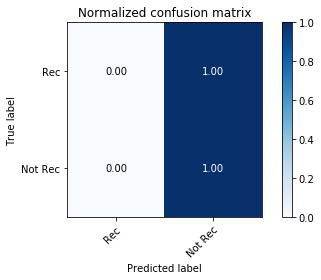

Normalized confusion matrix
[[0. 1.]
 [0. 1.]]


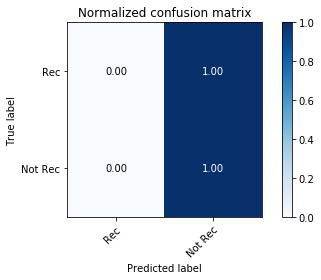

Normalized confusion matrix
[[5.43e-04 9.99e-01]
 [3.25e-04 1.00e+00]]


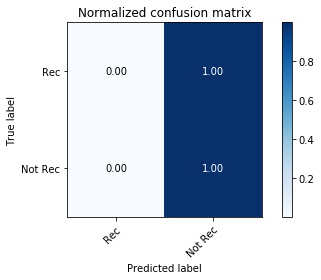

Normalized confusion matrix
[[0.07 0.93]
 [0.02 0.98]]


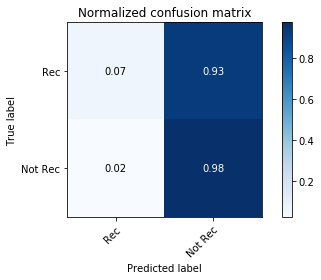

Normalized confusion matrix
[[0.3  0.7 ]
 [0.11 0.89]]


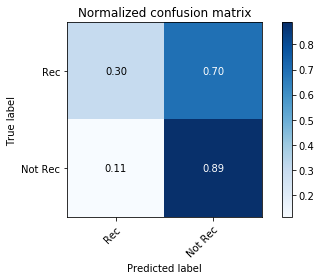

Normalized confusion matrix
[[0.6  0.4 ]
 [0.33 0.67]]


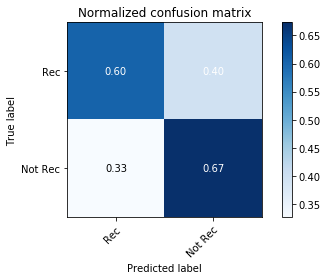

Normalized confusion matrix
[[0.91 0.09]
 [0.74 0.26]]


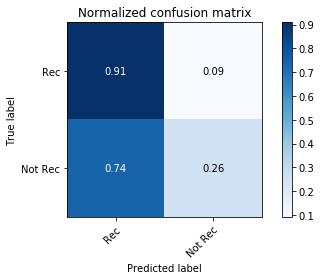

Normalized confusion matrix
[[0.99 0.01]
 [0.93 0.07]]


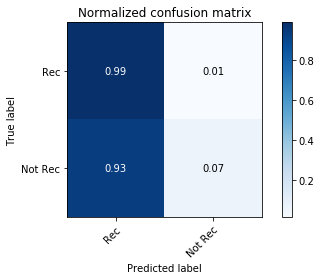

Normalized confusion matrix
[[1.   0.  ]
 [0.97 0.03]]


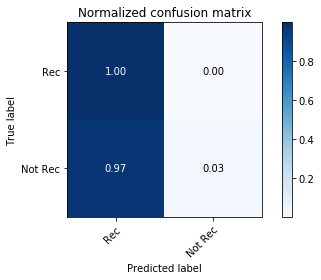

In [213]:
for i in range(10):
    plot_confusion_matrix(bi_test[i], bi_predict[i], classes=np.array(['Rec','Not Rec']), normalize=True,
                          title='Normalized confusion matrix')

    plt.show()

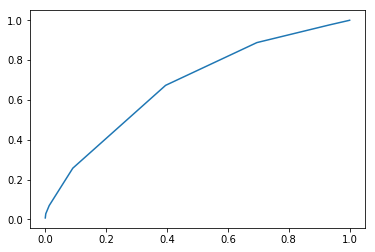

In [211]:
plt.plot(fpr, tpr)

In [212]:
from sklearn import metrics
metrics.auc(fpr, tpr)

0.6764346815872728